## Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning


## Conversion rate analysis based on income, spending and age


### Load Dataset

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv('marketing_campaign_data.csv')
pd.set_option('display.max_columns',None)
df.head(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,09-09-2013,16,520000,42000,98000,0,42000,14000,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,6,965,1971,S1,Cerai,55635000.0,0,1,13-11-2012,34,235000,65000,164000,50000,49000,27000,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,7,6177,1985,S3,Menikah,33454000.0,1,0,08-05-2013,32,76000,10000,56000,3000,1000,23000,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,19,14000,0,24000,3000,3000,2000,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,9,5899,1950,S3,Bertunangan,5648000.0,1,1,13-03-2014,68,28000,0,6000,1000,1000,13000,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [4]:
missing_value=df.isnull().sum().sort_values(ascending=False)[:8]
missing_value

Income               24
Unnamed: 0            0
NumDealsPurchases     0
Z_Revenue             0
Z_CostContact         0
Complain              0
AcceptedCmp2          0
AcceptedCmp1          0
dtype: int64

In [5]:
#replace data type Dt_Customer to Datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9816\2909601596.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,559.75,1119.5,1679.25,2239.0
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0


### Feature engineering


In [7]:
df_1 = df.copy()

In [8]:
#create NumChildren
df_1['NumChildren'] = df_1['Kidhome']+df_1['Teenhome']

In [9]:
# create Has_Parents 
df_1['Has_Parents'] = df_1['NumChildren'] > 0

In [10]:
#create total accepted campaign
df_1['Total_Acc_Cmp'] = df_1['AcceptedCmp1']+df_1['AcceptedCmp2']+df_1['AcceptedCmp3']+df_1['AcceptedCmp4']+df_1['AcceptedCmp5']

#create total purchases feature
df_1['Total_Purchases'] = df_1['NumDealsPurchases']+df_1['NumWebPurchases']+df_1['NumCatalogPurchases']+df_1['NumStorePurchases']

In [11]:
#create total spent feature
df_1['Total_Spent'] = df_1['MntCoke']+df_1['MntFishProducts']+df_1['MntFruits']+df_1['MntMeatProducts']+df_1['MntSweetProducts']+df_1['MntGoldProds']

In [12]:
#create conversion rate feature
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
df_1['Conversion_rate'] = df_1.apply(lambda x: round(safe_div(x['Response'], x['NumWebVisitsMonth']), 2), axis=1)

In [13]:
df_1.sample(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumChildren,Has_Parents,Total_Acc_Cmp,Total_Purchases,Total_Spent,Conversion_rate
1508,1508,3967,1971,S3,Menikah,78931000.0,0,0,2013-10-25,19,331000,197000,170000,58000,152000,35000,1,2,8,13,1,0,0,0,0,0,0,3,11,0,0,False,0,24,943000,0.00
900,900,8624,1958,S1,Menikah,81320000.0,0,0,2013-06-02,61,183000,33000,493000,59000,103000,57000,1,4,3,10,2,0,0,0,0,0,0,3,11,0,0,False,0,18,928000,0.00
1444,1444,1553,1946,S1,Bertunangan,82657000.0,0,0,2013-09-27,71,966000,168000,672000,246000,105000,126000,1,7,5,10,4,0,1,0,1,0,0,3,11,0,0,False,2,23,2283000,0.00
1865,1865,3678,1973,S1,Janda,60208000.0,1,1,2012-07-10,13,488000,23000,71000,15000,0,59000,11,8,3,7,7,0,1,0,0,0,0,3,11,1,2,True,1,29,656000,0.14
583,583,5123,1951,S2,Menikah,27450000.0,0,0,2013-04-15,57,37000,12000,23000,8000,11000,52000,1,2,1,3,7,0,0,0,0,0,0,3,11,0,0,False,0,7,143000,0.00
2015,2015,4102,1975,D3,Menikah,37284000.0,1,1,2013-03-29,46,11000,1000,2000,2000,1000,6000,1,0,0,3,6,0,0,0,0,0,0,3,11,0,2,True,0,4,23000,0.00
555,555,8692,1952,S1,Bertunangan,43462000.0,1,1,2012-12-09,50,90000,17000,97000,15000,6000,15000,6,4,1,5,8,0,0,0,0,0,0,3,11,0,2,True,0,16,240000,0.00
1674,1674,3389,1970,S1,Menikah,69016000.0,0,1,2012-11-22,61,726000,53000,363000,123000,107000,161000,4,8,9,13,5,0,0,0,0,0,0,3,11,0,1,True,0,34,1533000,0.00
1789,1789,6173,1979,S1,Bertunangan,77298000.0,0,1,2013-02-11,46,425000,115000,292000,23000,35000,79000,1,6,6,11,3,0,0,0,0,0,0,3,11,0,1,True,0,24,969000,0.00
1863,1863,3254,1971,S1,Menikah,70886000.0,1,0,2013-10-14,65,407000,70000,239000,103000,88000,53000,1,5,4,4,2,0,0,0,0,0,0,3,11,0,1,True,0,14,960000,0.00


### Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok


In [14]:
df_1.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumChildren,Has_Parents,Total_Acc_Cmp,Total_Purchases,Total_Spent,Conversion_rate
2193,2193,8722,1957,D3,Menikah,82347000.0,0,0,2012-06-11,38,556000,54000,845000,202000,133000,63000,1,7,7,10,3,1,0,0,1,0,0,3,11,1,0,False,2,25,1853000,0.33
1180,1180,359,1950,S1,Bertunangan,48070000.0,0,1,2013-01-13,33,373000,14000,83000,6000,9000,19000,3,8,2,6,7,0,0,0,0,0,1,3,11,0,1,True,0,19,504000,0.00
541,541,10591,1969,S1,Janda,43638000.0,0,1,2012-06-08,37,63000,10000,83000,7000,19000,19000,2,4,1,4,7,0,0,0,0,0,0,3,11,0,1,True,0,11,201000,0.00
1620,1620,8286,1965,S3,Bertunangan,51717000.0,0,1,2013-08-20,55,98000,1000,17000,0,1000,5000,1,3,0,4,7,0,1,0,0,0,0,3,11,0,1,True,1,8,122000,0.00
2205,2205,5959,1968,S1,Lajang,35893000.0,1,1,2012-10-15,80,158000,0,23000,0,0,18000,6,3,1,5,8,0,0,0,0,0,0,3,11,0,2,True,0,15,199000,0.00


In [15]:
# Mengurutkan DataFrame berdasarkan kolom 'Dt_Customer'
df_sorted = df_1.sort_values(by='Dt_Customer', ascending=False)

# Mengambil baris pertama (baris dengan tanggal pendaftaran terbaru)
recent_customer = df_sorted.iloc[0]
recent_customer

Unnamed: 0                            2003
ID                                    6679
Year_Birth                            1966
Education                               S1
Marital_Status                      Lajang
Income                          33279000.0
Kidhome                                  0
Teenhome                                 0
Dt_Customer            2014-12-06 00:00:00
Recency                                 29
MntCoke                              10000
MntFruits                             3000
MntMeatProducts                       3000
MntFishProducts                          0
MntSweetProducts                         0
MntGoldProds                             0
NumDealsPurchases                        1
NumWebPurchases                          0
NumCatalogPurchases                      0
NumStorePurchases                        3
NumWebVisitsMonth                        3
AcceptedCmp3                             0
AcceptedCmp4                             0
AcceptedCmp

##### Age of Customer

In [16]:
time=2014
df_1['age'] = time - df_1['Year_Birth']

In [17]:
df_1.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumChildren,Has_Parents,Total_Acc_Cmp,Total_Purchases,Total_Spent,Conversion_rate,age
1845,1845,7872,1975,S3,Menikah,86836000.0,0,0,2012-12-09,7,179000,21000,273000,0,21000,63000,1,6,10,6,5,1,0,1,1,0,0,3,11,1,0,False,3,23,557000,0.2,39
685,685,10142,1976,S3,Cerai,66476000.0,0,1,2013-07-03,99,372000,18000,126000,47000,48000,78000,2,5,2,11,4,0,0,0,0,0,0,3,11,0,1,True,0,20,689000,0.0,38
1585,1585,1626,1973,S3,Cerai,35860000.0,1,1,2014-05-19,37,15000,0,8000,4000,2000,20000,2,1,1,2,5,1,0,0,0,0,0,3,11,1,2,True,1,6,49000,0.2,41
1060,1060,4491,1949,S2,Menikah,62845000.0,1,1,2012-01-10,3,1099000,0,45000,0,0,34000,11,3,4,10,8,0,1,0,0,0,0,3,11,0,2,True,1,28,1178000,0.0,65
2029,2029,10001,1985,D3,Bertunangan,7500000.0,1,0,2012-01-08,98,5000,17000,17000,13000,14000,34000,4,2,1,3,9,0,0,0,0,0,0,3,11,0,1,True,0,10,100000,0.0,29


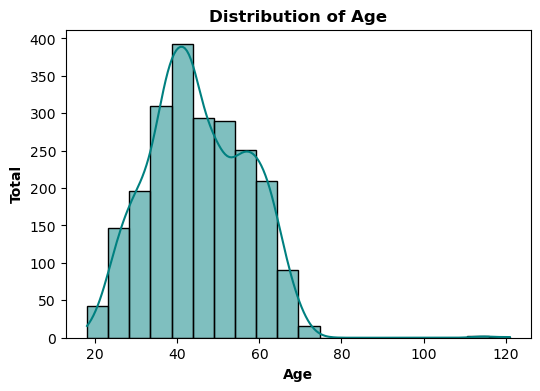

In [18]:
# Melihat persebaran umur customer
plt.figure(figsize=(6, 4))
plt.title('Distribution of Age',weight='bold')
sns.histplot(df_1['age'], kde=True, bins=20, color='teal')
plt.xlabel('Age',weight='bold')
plt.ylabel('Total',weight='bold')
plt.show()

In [19]:
# Grup of Age 
group_age = []

for i in df_1['age']:
    if i < 35 :
        grup = 'Young Adult'
    elif i < 60 :
        grup = 'Adult'
    else:
        grup = 'Senior Adult'
    group_age.append(grup)

df_1['grup_age'] = group_age

In [20]:
df_1.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumChildren,Has_Parents,Total_Acc_Cmp,Total_Purchases,Total_Spent,Conversion_rate,age,grup_age
90,90,8996,1957,S3,Menikah,NaN,2,1,2012-11-19,4,230000,42000,192000,49000,37000,53000,12,7,2,8,9,0,0,0,0,0,0,3,11,0,3,True,0,29,603000,0.00,57,Adult
2184,2184,8207,1957,D3,Menikah,53233000.0,0,1,2014-03-18,18,28000,0,9000,3000,0,0,1,1,0,3,4,0,0,0,0,0,0,3,11,0,1,True,0,5,40000,0.00,57,Adult
1570,1570,4261,1946,S3,Lajang,82800000.0,0,0,2012-11-24,23,1006000,22000,115000,59000,68000,45000,1,7,6,12,3,0,0,1,1,0,0,3,11,1,0,False,2,26,1315000,0.33,68,Senior Adult
933,933,5692,1989,SMA,Menikah,25443000.0,1,0,2012-12-22,82,1000,4000,3000,8000,9000,7000,1,1,0,3,8,0,0,0,0,0,0,3,11,0,1,True,0,5,32000,0.00,25,Young Adult
1096,1096,4790,1958,S1,Cerai,79803000.0,0,1,2014-02-06,54,574000,8000,216000,21000,16000,33000,1,4,3,5,1,0,0,0,0,0,0,3,11,0,1,True,0,13,868000,0.00,56,Adult


### Plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign


In [21]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   datetime64[ns]
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

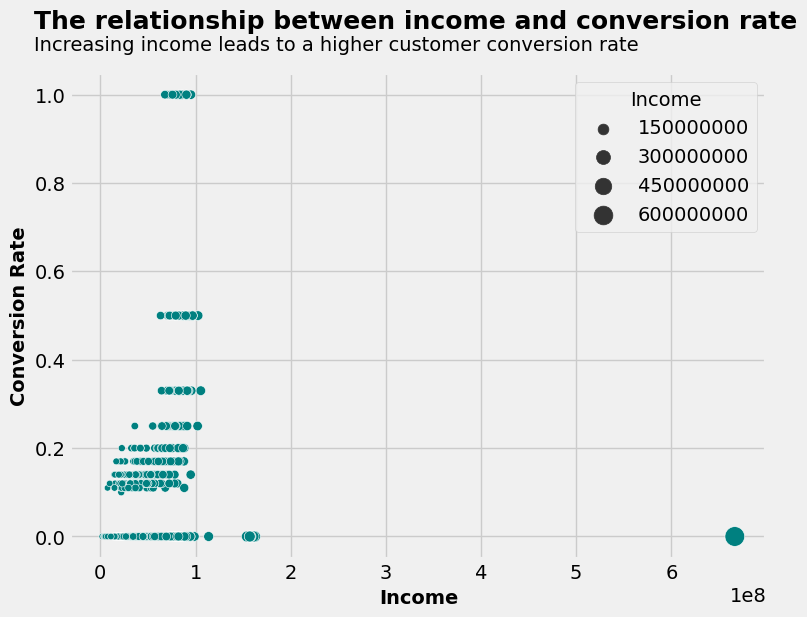

In [22]:
# Relationship between income and conversion rate
plt.rcdefaults()
import matplotlib.style as style
style.use('fivethirtyeight')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_1, x='Income', y='Conversion_rate', size='Income', sizes=(20, 200), color='teal')
plt.xlabel('Income', weight='bold')
plt.ylabel('Conversion Rate', weight='bold')


plt.text(x=-70000000,y=1.15, s='The relationship between income and conversion rate', fontsize=18, fontweight='bold')
plt.text(x=-70000000, y=1.1, s='Increasing income leads to a higher customer conversion rate', fontsize=14)
plt.show()

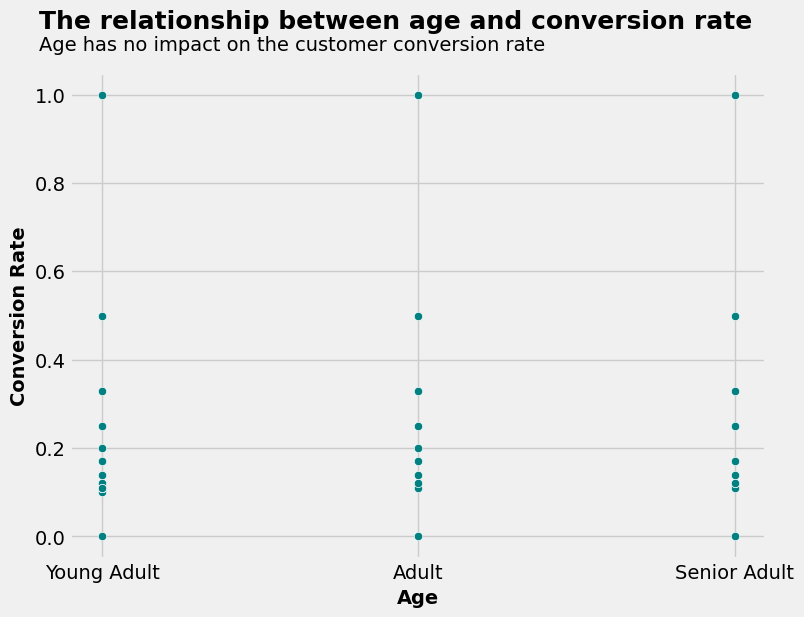

In [23]:
# Define the order of the age groups
age_order = ["Young Adult", "Adult", "Senior Adult"]

# Create a custom order column based on age_order
df_1['age_order'] = df_1['grup_age'].map({age: i for i, age in enumerate(age_order)})

plt.rcdefaults()
import matplotlib.style as style
style.use('fivethirtyeight')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_1, x='age_order', y='Conversion_rate', color='teal')

# Customize the x-ticks to display the age groups
plt.xticks(ticks=range(len(age_order)), labels=age_order)

plt.xlabel('Age', weight='bold')
plt.ylabel('Conversion Rate', weight='bold')

plt.text(x=-0.2, y=1.15, s='The relationship between age and conversion rate', fontsize=18, fontweight='bold')
plt.text(x=-0.2, y=1.1, s='Age has no impact on the customer conversion rate', fontsize=14)
plt.show()


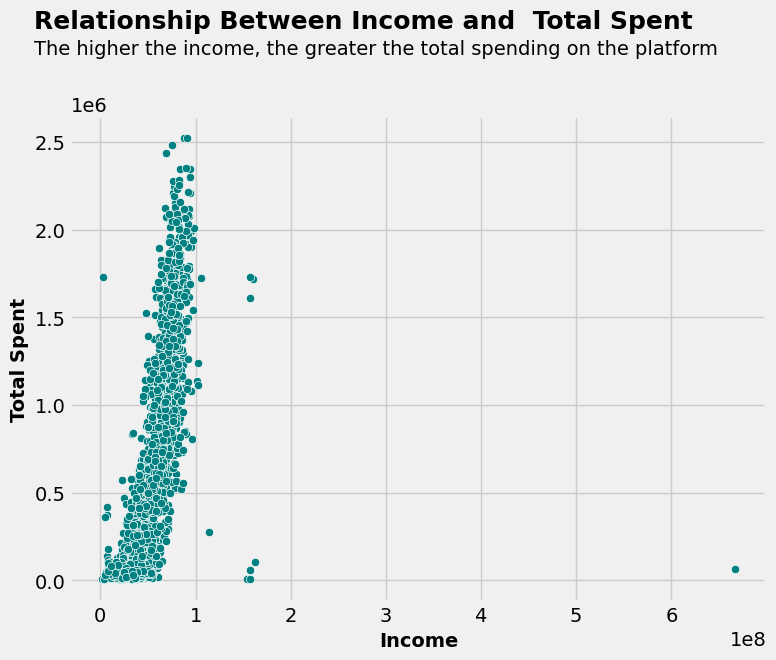

In [24]:
# Relationship Between Income and  Total_Spent
plt.rcdefaults()
import matplotlib.style as style
style.use('fivethirtyeight')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_1, x='Income', y='Total_Spent', color='teal')
plt.xlabel('Income', weight='bold')
plt.ylabel('Total Spent', weight='bold')

plt.text(x=-70000000,y=3150000, s='Relationship Between Income and  Total Spent', fontsize=18, fontweight='bold')
plt.text(x=-70000000, y=3000000, s='The higher the income, the greater the total spending on the platform', fontsize=14)
plt.show()



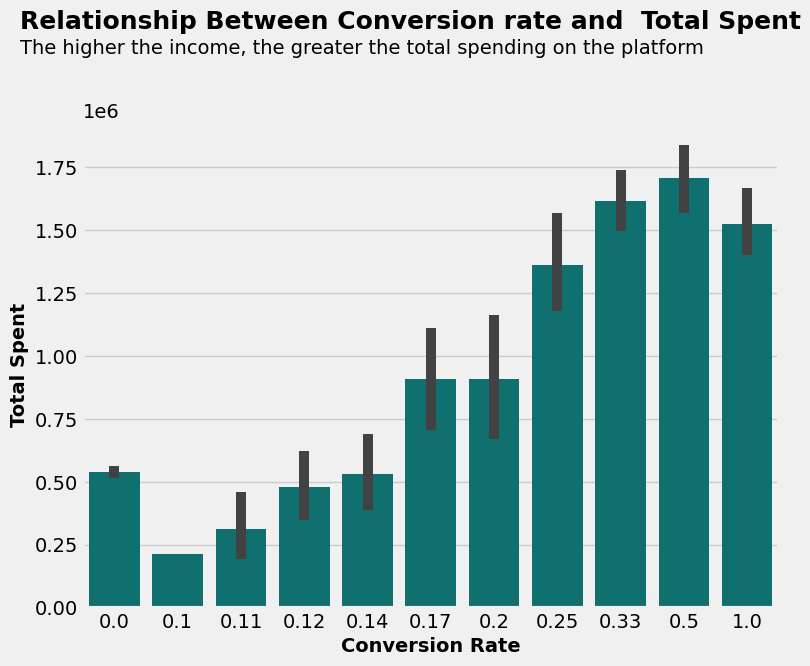

In [25]:
# Relationship between conversion rate dengan Total Spent
plt.rcdefaults()
import matplotlib.style as style
style.use('fivethirtyeight')

plt.figure(figsize=(8, 6))
sns.barplot(data=df_1, x='Conversion_rate', y='Total_Spent', color='teal')
plt.xlabel('Conversion Rate', weight='bold')
plt.ylabel('Total Spent', weight='bold')

plt.text(x=-1.5,y=2300000, s='Relationship Between Conversion rate and  Total Spent', fontsize=18, fontweight='bold')
plt.text(x=-1.5, y=2200000, s='The higher the income, the greater the total spending on the platform', fontsize=14)

plt.show()

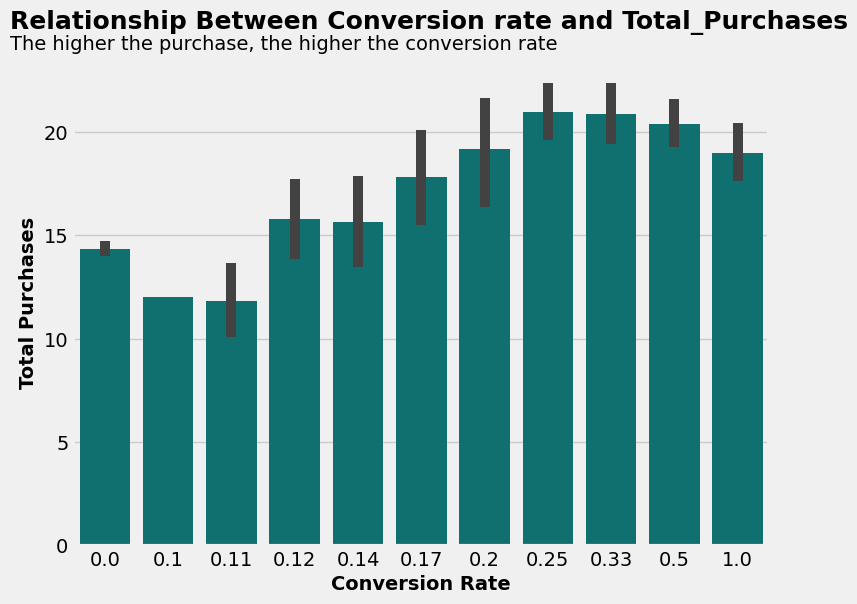

In [26]:
# Relationship between conversion rate and Total Purchases
plt.rcdefaults()
import matplotlib.style as style
style.use('fivethirtyeight')


plt.figure(figsize=(8, 6))
sns.barplot(data=df_1, x='Conversion_rate', y='Total_Purchases', color='teal')
plt.xlabel('Conversion Rate', weight='bold')
plt.ylabel('Total Purchases', weight='bold')

plt.text(x=-1.5,y=25, s='Relationship Between Conversion rate and Total_Purchases', fontsize=18, fontweight='bold')
plt.text(x=-1.5, y=24, s='The higher the purchase, the higher the conversion rate', fontsize=14)

plt.show()

## TASK 2
Data Cleaning & Preprocessing


In [27]:
df_1.sample(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumChildren,Has_Parents,Total_Acc_Cmp,Total_Purchases,Total_Spent,Conversion_rate,age,grup_age,age_order
34,34,8755,1946,S2,Menikah,68657000.0,0,0,2013-02-20,4,482000,34000,471000,119000,68000,22000,1,3,5,9,7,0,0,0,0,0,0,3,11,0,0,False,0,18,1196000,0.00,68,Senior Adult,2
46,46,9909,1996,D3,Menikah,7500000.0,0,0,2012-09-11,24,3000,18000,14000,15000,22000,50000,3,3,1,3,9,0,0,0,0,0,0,3,11,1,0,False,0,10,122000,0.11,18,Young Adult,0
1833,1833,5866,1974,S1,Bertunangan,48186000.0,1,0,2014-03-20,39,97000,3000,66000,12000,7000,34000,3,4,1,4,7,0,0,0,0,0,0,3,11,0,1,True,0,12,219000,0.00,40,Adult,1
1232,1232,1307,1978,S1,Cerai,41986000.0,0,1,2014-09-02,15,27000,5000,8000,8000,3000,12000,3,3,0,4,4,0,0,0,0,0,0,3,11,0,1,True,0,10,63000,0.00,36,Adult,1
523,523,4943,1953,S1,Menikah,70503000.0,0,0,2012-09-30,73,1379000,33000,216000,0,33000,66000,1,2,4,9,6,0,1,1,0,0,0,3,11,0,0,False,2,16,1727000,0.00,61,Senior Adult,2
2010,2010,2002,1958,S1,Cerai,71964000.0,0,0,2013-05-20,81,587000,51000,932000,180000,34000,86000,1,5,6,5,3,0,0,0,0,0,0,3,11,0,0,False,0,17,1870000,0.00,56,Adult,1
529,529,3281,1960,S3,Menikah,49154000.0,1,1,2013-03-11,69,206000,10000,67000,30000,27000,71000,6,4,1,8,6,0,0,0,0,0,0,3,11,0,2,True,0,19,411000,0.00,54,Adult,1
2211,2211,10469,1981,S1,Bertunangan,88325000.0,0,0,2014-05-02,42,519000,71000,860000,93000,27000,53000,1,6,2,9,2,0,0,0,0,0,0,3,11,0,0,False,0,18,1623000,0.00,33,Young Adult,0
213,213,2877,1974,S2,Bertunangan,46014000.0,1,1,2013-01-21,21,410000,0,59000,19000,9000,44000,10,7,1,8,7,0,0,0,0,0,0,3,11,0,2,True,0,26,541000,0.00,40,Adult,1
987,987,4580,1969,S1,Menikah,75759000.0,0,0,2013-10-25,46,1394000,22000,708000,89000,91000,182000,1,9,7,9,5,1,0,1,1,0,0,3,11,1,0,False,3,26,2486000,0.20,45,Adult,1


#### Mengatasi data null dan duplicated


In [28]:
df_final = df_1.copy()

In [29]:
df_final.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumChildren,Has_Parents,Total_Acc_Cmp,Total_Purchases,Total_Spent,Conversion_rate,age,grup_age,age_order
1158,1158,7959,1961,S1,Menikah,79410000.0,0,0,2014-05-29,19,658000,80000,483000,123000,13000,13000,1,3,2,5,1,0,0,0,0,0,0,3,11,0,0,False,0,11,1370000,0.00,53,Adult,1
1030,1030,5204,1971,S1,Bertunangan,74538000.0,0,0,2013-06-29,21,380000,98000,733000,110000,112000,28000,1,8,8,5,3,0,0,1,0,0,0,3,11,1,0,False,1,22,1461000,0.33,43,Adult,1
423,423,1361,1974,S2,Menikah,82584000.0,0,0,2013-04-06,26,1076000,68000,103000,29000,91000,68000,1,3,4,8,1,0,1,1,0,0,0,3,11,1,0,False,2,16,1435000,1.00,40,Adult,1
775,775,6825,1953,S1,Bertunangan,41452000.0,1,1,2013-06-03,86,13000,0,3000,0,0,0,1,1,0,2,7,0,0,0,0,0,0,3,11,0,2,True,0,4,16000,0.00,61,Senior Adult,2
2156,2156,8726,1964,D3,Cerai,41713000.0,1,1,2014-04-29,57,77000,8000,44000,10000,10000,25000,5,3,1,4,6,0,0,0,0,0,0,3,11,0,2,True,0,13,174000,0.00,50,Adult,1


In [30]:
missing_values=df_final.isnull().sum().sort_values(ascending=False)[:8]
missing_values

Income          24
Unnamed: 0       0
Response         0
AcceptedCmp4     0
AcceptedCmp5     0
AcceptedCmp1     0
AcceptedCmp2     0
Complain         0
dtype: int64

In [31]:
total_rows = len(df_final)
missing_percentage = (missing_values / total_rows) * 100
missing_percentage

Income          1.071429
Unnamed: 0      0.000000
Response        0.000000
AcceptedCmp4    0.000000
AcceptedCmp5    0.000000
AcceptedCmp1    0.000000
AcceptedCmp2    0.000000
Complain        0.000000
dtype: float64

In [32]:
# Handling Missing Value 
median_income = df_final['Income'].median()
df_final['Income'].fillna(median_income, inplace=True)

In [33]:
missing_values=df_final.isnull().sum().sort_values(ascending=False)[:8]
missing_values

Unnamed: 0       0
Response         0
AcceptedCmp4     0
AcceptedCmp5     0
AcceptedCmp1     0
AcceptedCmp2     0
Complain         0
Z_CostContact    0
dtype: int64

In [34]:
# Handling data duplicated
df_final.duplicated().sum()

0

### Remove kolom yang tidak diperlukan

In [35]:
df_final.drop(['Unnamed: 0','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                'MntCoke','MntFishProducts','MntFruits','MntMeatProducts','MntSweetProducts', 'MntGoldProds',
                'Kidhome','Teenhome','age_order','Year_Birth','ID','Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

In [36]:
df_final.sample(5)

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Response,NumChildren,Has_Parents,Total_Acc_Cmp,Total_Purchases,Total_Spent,Conversion_rate,age,grup_age
209,S1,Cerai,64497000.0,2012-10-09,17,8,0,1,1,True,1,29,1804000,0.12,60,Senior Adult
622,S1,Janda,72298000.0,2014-10-03,52,1,0,0,0,False,2,14,939000,0.00,65,Senior Adult
190,SMA,Bertunangan,24882000.0,2012-09-09,52,6,0,0,1,True,1,5,80000,0.00,36,Adult
1521,S1,Bertunangan,69930000.0,2013-05-26,21,3,0,0,0,False,0,22,1662000,0.00,43,Adult
1056,S1,Menikah,42557000.0,2012-08-29,98,8,0,0,1,True,0,15,270000,0.00,40,Adult


In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Education          2240 non-null   object        
 1   Marital_Status     2240 non-null   object        
 2   Income             2240 non-null   float64       
 3   Dt_Customer        2240 non-null   datetime64[ns]
 4   Recency            2240 non-null   int64         
 5   NumWebVisitsMonth  2240 non-null   int64         
 6   Complain           2240 non-null   int64         
 7   Response           2240 non-null   int64         
 8   NumChildren        2240 non-null   int64         
 9   Has_Parents        2240 non-null   bool          
 10  Total_Acc_Cmp      2240 non-null   int64         
 11  Total_Purchases    2240 non-null   int64         
 12  Total_Spent        2240 non-null   int64         
 13  Conversion_rate    2240 non-null   float64       
 14  age     

### Label Encoding and One Hot Encoding

In [38]:
# Label Encoding 
mapping_education = {
    'SMA' : 0,
    'D3'  : 1,
    'S1'  : 2,
    'S2'  : 3,
    'S3'  : 4
} 

df_final['Education'] = df_final['Education'].map(mapping_education)

In [39]:
# One Hot encoding 
df_final = pd.get_dummies(df_final, columns=['Marital_Status', 'grup_age', 'Has_Parents'])

In [40]:
df_final.sample(5)

,Education,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Response,NumChildren,Total_Acc_Cmp,Total_Purchases,Total_Spent,Conversion_rate,age,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,grup_age_Adult,grup_age_Senior Adult,grup_age_Young Adult,Has_Parents_False,Has_Parents_True
48,2,51381500.0,2014-01-01,96,6,0,0,3,0,10,124000,0.0,63,0,0,0,0,1,0,0,1,0,0,1
2130,2,30992000.0,2013-04-22,83,7,0,0,1,0,5,43000,0.0,38,0,1,0,0,0,0,1,0,0,0,1
1465,3,49476000.0,2013-06-20,29,2,0,0,1,0,22,795000,0.0,51,0,1,0,0,0,0,1,0,0,0,1
1714,0,18746000.0,2014-05-29,41,6,0,0,1,0,8,64000,0.0,22,0,0,0,0,1,0,0,0,1,0,1
1798,2,63404000.0,2014-06-06,97,4,0,0,2,1,15,902000,0.0,50,1,0,0,0,0,0,1,0,0,0,1


#### Menentukan Kolom yang akan digunakan dengan metode RMF
Recency (R): Recency (kolom Recency)

Frequency (F): Total_Purchases (jumlah total pembelian)

Monetary (M):Total_Spent(total pengeluaran)




In [41]:
df_mod = df_final.copy()

In [42]:
df_mod = df_mod[['Recency', 'Total_Purchases', 'Total_Spent']]

In [43]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Recency          2240 non-null   int64
 1   Total_Purchases  2240 non-null   int64
 2   Total_Spent      2240 non-null   int64
dtypes: int64(3)
memory usage: 52.6 KB


In [44]:
df_mod.sample(10)

,Recency,Total_Purchases,Total_Spent
1898,9,27,277000
2013,92,27,839000
1667,71,9,47000
202,63,29,1150000
446,92,11,192000
1784,8,17,318000
311,28,7,37000
888,46,24,564000
237,32,19,605000
1424,77,5,60000


In [45]:
df_mod.describe()

,Recency,Total_Purchases,Total_Spent
count,2240.000000,2240.000000,2.240000e+03
mean,49.109375,14.862054,6.057982e+05
std,28.962453,7.677173,6.022493e+05
min,0.000000,0.000000,5.000000e+03
25%,24.000000,8.000000,6.875000e+04
50%,49.000000,15.000000,3.960000e+05
75%,74.000000,21.000000,1.045500e+06
max,99.000000,44.000000,2.525000e+06


#### Handling Outlier

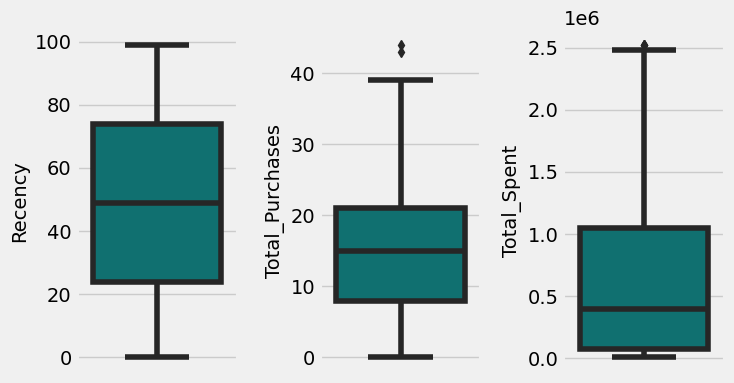

In [46]:
cols = df_mod.columns
plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df_mod[cols[i]], orient='v',color='teal')
    plt.tight_layout()

In [47]:
numeric_columns=['Recency','Total_Purchases','Total_Spent']

for col in numeric_columns:
    high_cut = df_mod[col].quantile(q=0.99)
    low_cut= df_mod[col].quantile(q=0.01)
    df_mod.loc[df_mod[col]>high_cut,col]=high_cut
    df_mod.loc[df_mod[col]<low_cut,col]=low_cut

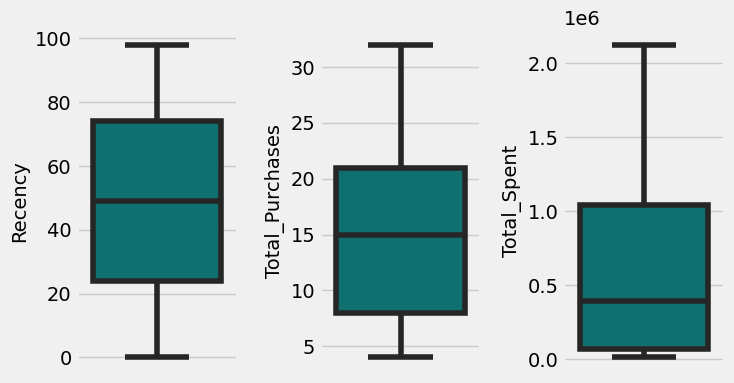

In [48]:
numeric_columns=['Recency','Total_Purchases','Total_Spent']

plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df_mod[numeric_columns[i]], orient='v',color='teal')
    plt.tight_layout()

In [49]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Recency          2240 non-null   int64
 1   Total_Purchases  2240 non-null   int64
 2   Total_Spent      2240 non-null   int64
dtypes: int64(3)
memory usage: 52.6 KB


#### Standarisasi

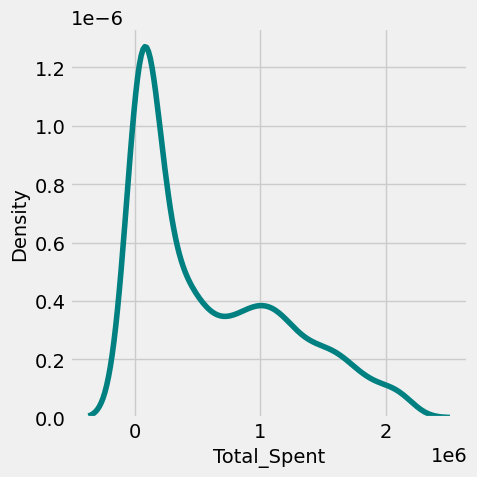

In [50]:
#column M distribution is right-skewed

plt.figure(figsize= (5, 5))
sns.kdeplot(x = df_mod['Total_Spent'],color='teal')
plt.tight_layout()

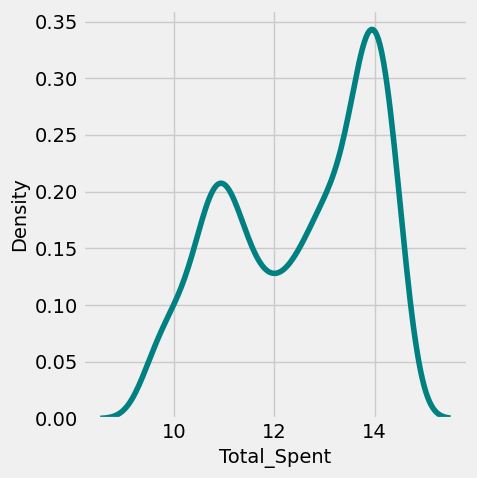

In [51]:
#log tranformation on column `M`

df_mod_log = df_mod.copy()
df_mod_log['Total_Spent'] = np.log(df_mod['Total_Spent'])

plt.figure(figsize= (5, 5))
sns.kdeplot(x = df_mod_log['Total_Spent'],color='teal')
plt.tight_layout()

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

col_name = list(df_mod_log.columns)

mm = MinMaxScaler()
df_mod_final = mm.fit_transform(df_mod_log)
df_mod_final = pd.DataFrame(df_mod_final, columns=col_name)
df_mod_final.sample(10)

,Recency,Total_Purchases,Total_Spent
1897,0.918367,0.392857,0.954390
1265,0.795918,0.464286,0.973987
1571,0.938776,0.142857,0.279384
284,0.183673,0.107143,0.205211
344,0.132653,0.000000,0.063845
515,0.479592,0.642857,0.996555
1192,0.561224,0.071429,0.392266
1062,0.234694,0.571429,0.768411
955,0.510204,0.285714,0.275717
478,0.948980,0.535714,0.727466


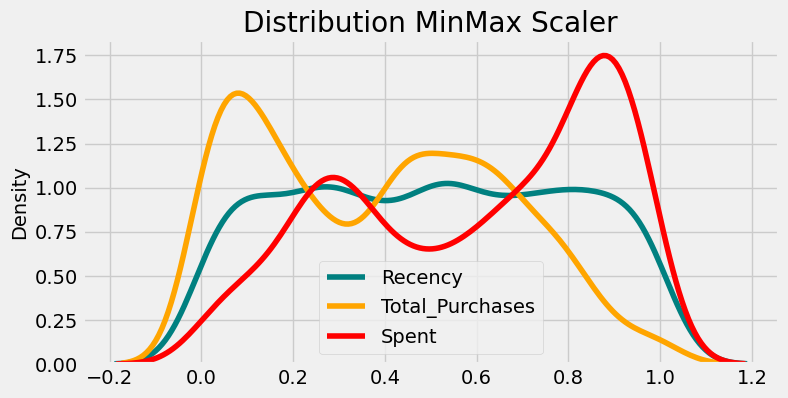

In [53]:
plt.figure(figsize=(8, 4))
plt.title('Distribution MinMax Scaler')
sns.kdeplot(df_mod_final['Recency'], label = 'Recency',color='teal')
sns.kdeplot(df_mod_final['Total_Purchases'], label = 'Total_Purchases',color='orange')
sns.kdeplot(df_mod_final['Total_Spent'], label = 'Spent',color='red')
plt.xlabel(None)
plt.legend()
plt.show()

## TASK 3
Data Modeling


### Melihat jumlah cluster yang tepat dengan menggunakan elbow method

In [54]:
final_mod = df_mod_final.copy()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_k

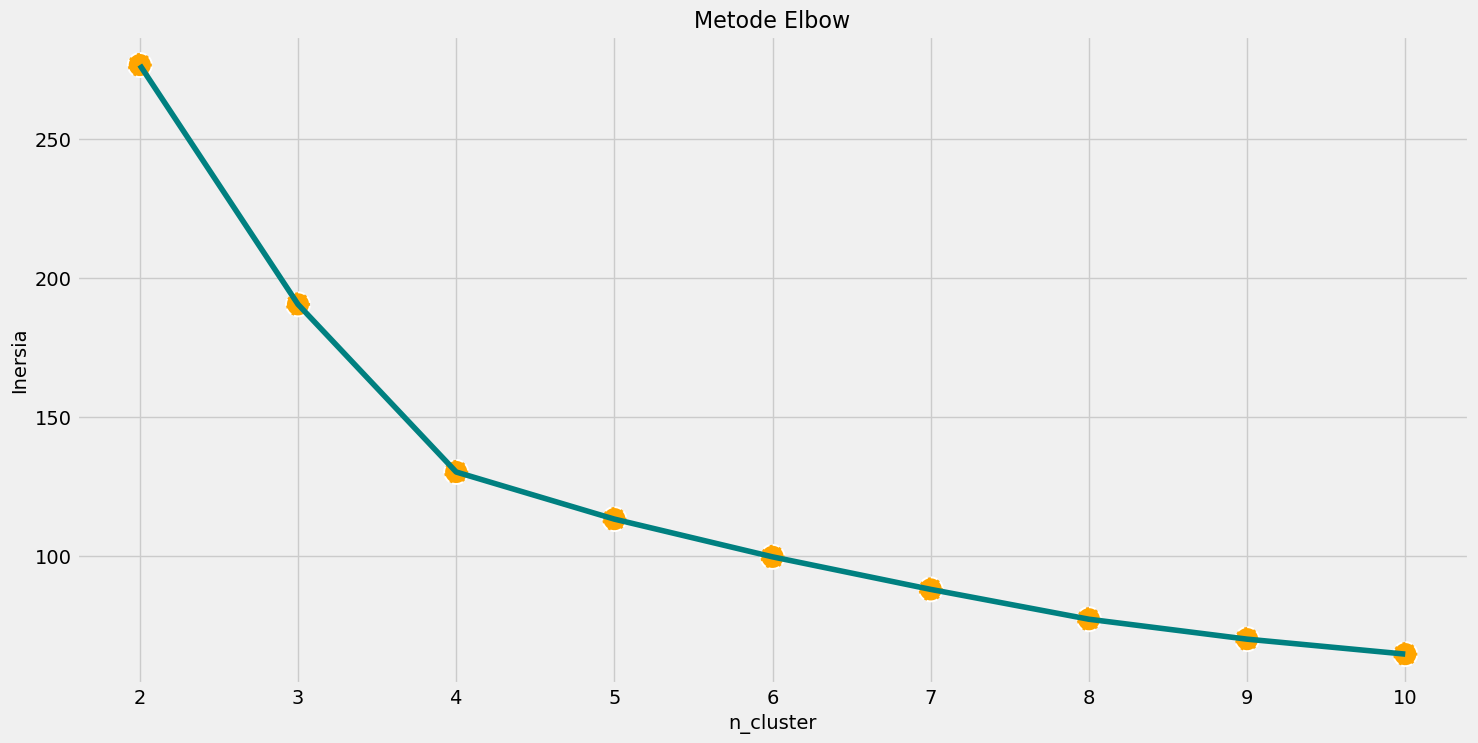

In [74]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(final_mod)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16, 8))

sns.lineplot(x=range(2, 11), y=inertia, color='teal', linewidth=4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='orange', linestyle='--')

plt.title('Metode Elbow', fontsize=16)
plt.xlabel('n_cluster', fontsize=14)  # Judul sumbu x
plt.ylabel('Inersia', fontsize=14)  # Judul sumbu y
plt.show()

In [76]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(final_mod )
    preds = kmeans.predict(final_mod )

    score_euclidean = silhouette_score(final_mod , preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_k

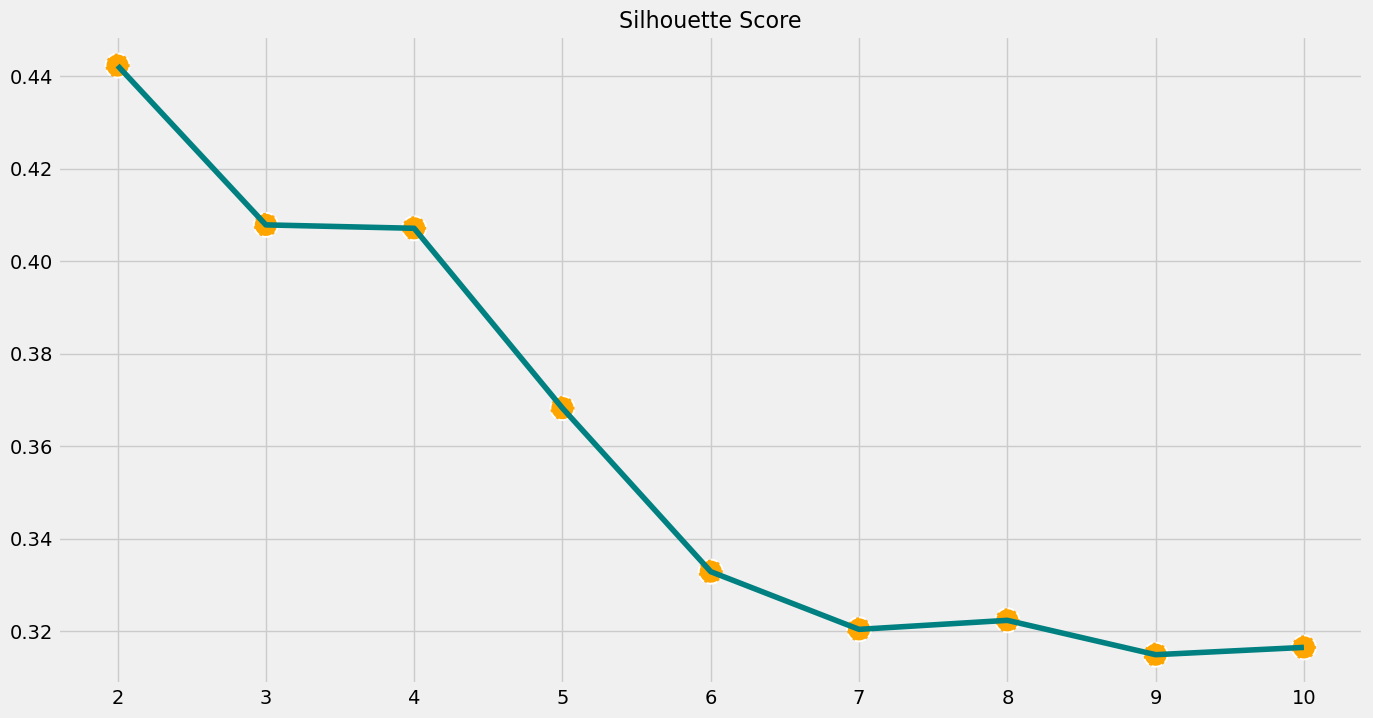

In [75]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='teal', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='orange',  linestyle='--')

plt.title('Silhouette Score', fontsize=16)
plt.show()

In [77]:
for i, score in enumerate(arr_silhouette_score_euclidean):
    print(f"Silhouette Score for n_cluster = {range_n_clusters[i]}: {score:.2f}")

Silhouette Score for n_cluster = 2: 0.44
Silhouette Score for n_cluster = 3: 0.41
Silhouette Score for n_cluster = 4: 0.41
Silhouette Score for n_cluster = 5: 0.37
Silhouette Score for n_cluster = 6: 0.34
Silhouette Score for n_cluster = 7: 0.32
Silhouette Score for n_cluster = 8: 0.32
Silhouette Score for n_cluster = 9: 0.32
Silhouette Score for n_cluster = 10: 0.31


#### Membuat Cluster

In [91]:
df_std_cluster = df_mod_final.copy()
df_cl = df_final.copy()

kmeans = KMeans(n_clusters=4, random_state=0).fit(df_mod_final)
df_std_cluster['km_labels'] = kmeans.labels_
df_cl['km_labels'] = kmeans.labels_
df_cl.sample(5)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Education,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Response,NumChildren,Total_Acc_Cmp,Total_Purchases,Total_Spent,Conversion_rate,age,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,grup_age_Adult,grup_age_Senior Adult,grup_age_Young Adult,Has_Parents_False,Has_Parents_True,km_labels
266,2,80124000.0,2014-06-26,47,1,0,0,0,1,19,1495000,0.00,51,0,0,0,0,0,1,1,0,0,1,0,1
1752,1,31859000.0,2014-02-27,3,7,0,0,1,0,5,48000,0.00,34,0,0,0,0,1,0,0,0,1,0,1,0
1405,4,36947000.0,2012-07-08,49,9,0,0,2,0,11,146000,0.00,47,0,0,0,0,0,1,1,0,0,0,1,2
884,4,86857000.0,2012-12-09,96,2,0,1,0,0,22,2114000,0.50,42,0,0,0,0,1,0,1,0,0,1,0,3
2098,3,81929000.0,2012-09-29,60,6,0,1,1,2,20,2053000,0.17,38,0,0,0,0,0,1,1,0,0,0,1,3


In [92]:
df_cl.groupby(['km_labels']).count()

,Education,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Response,NumChildren,Total_Acc_Cmp,Total_Purchases,Total_Spent,Conversion_rate,age,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,grup_age_Adult,grup_age_Senior Adult,grup_age_Young Adult,Has_Parents_False,Has_Parents_True
km_labels,,,,,,,,,,,,,,,,,,,,,,,,
0,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496,496
1,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617
2,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477
3,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650,650


### Dimensionality Reduction

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(final_mod)
pcs = pca.transform(final_mod)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,-0.503878,-0.078395
1,0.550856,0.100741
2,-0.293302,0.243072
3,0.408275,0.226309
4,-0.173896,-0.453588


In [94]:
df_pca['km_labels'] = kmeans.labels_
df_pca.head(2)

,PC 1,PC 2,km_labels
0,-0.503878,-0.078395,3
1,0.550856,0.100741,0


In [95]:
df_pca['km_labels'].value_counts()

3    650
1    617
0    496
2    477
Name: km_labels, dtype: int64

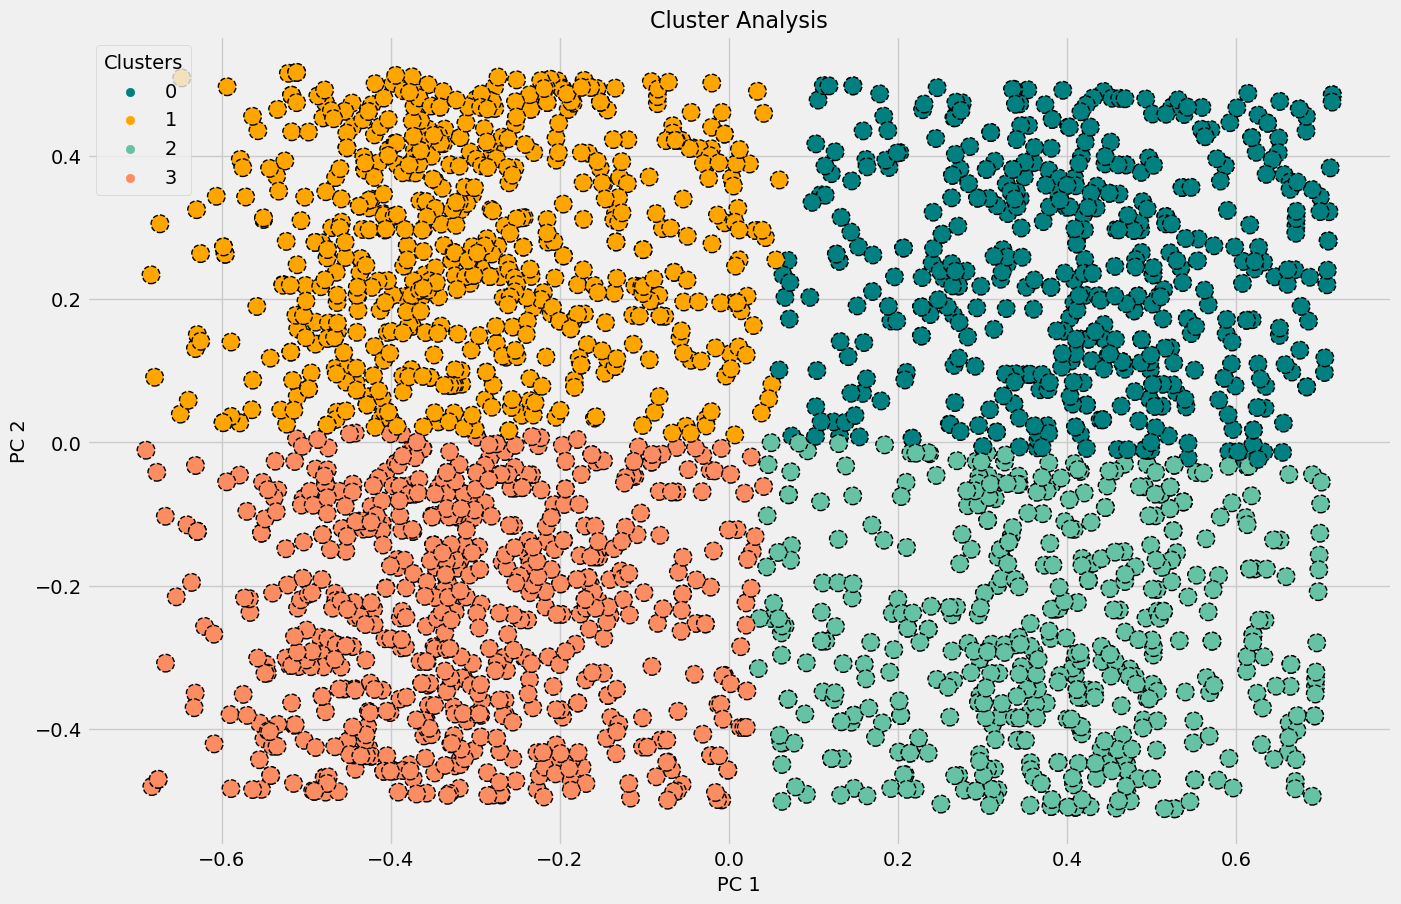

In [108]:
custom_palette = sns.color_palette(['teal', 'orange'])
custom_palette.extend(['#66c2a5', '#fc8d62'])

fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="km_labels",
    data=df_pca,
    edgecolor='black',
    linestyle='--',
    s=160,
    palette=custom_palette,
    ax=ax
)

plt.title('Cluster Analysis', fontsize=16)
plt.legend(title="Clusters")

plt.show()

## TASK 4

In [97]:
df_std_cluster['km_labels'] = kmeans.labels_
df_cl['km_labels'] = kmeans.labels_
df_cl.sample(5)

,Education,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Response,NumChildren,Total_Acc_Cmp,Total_Purchases,Total_Spent,Conversion_rate,age,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,grup_age_Adult,grup_age_Senior Adult,grup_age_Young Adult,Has_Parents_False,Has_Parents_True,km_labels
1701,3,38452000.0,2014-03-30,62,7,0,0,2,0,9,72000,0.00,59,0,0,0,0,0,1,1,0,0,0,1,2
1986,2,57113000.0,2013-06-02,45,7,0,0,2,0,16,263000,0.00,36,0,0,0,0,0,1,1,0,0,0,1,1
1263,2,31454000.0,2013-06-07,40,8,0,0,2,0,8,48000,0.00,54,0,0,0,0,0,1,1,0,0,0,1,0
399,1,14515000.0,2012-09-11,71,7,0,1,1,0,11,96000,0.14,34,1,0,0,0,0,0,0,0,1,0,1,2
556,4,54880000.0,2013-01-03,57,5,0,0,1,0,21,795000,0.00,36,0,0,0,0,1,0,1,0,0,0,1,3


In [98]:
display(df_cl.groupby('km_labels').agg(['mean','median', 'max', 'min']))

Education                       Income                           \
               mean median max min          mean      median          max   
km_labels                                                                   
0          2.356855    2.0   4   0  3.547752e+07  33347000.0  666666000.0   
1          2.528363    2.0   4   1  6.540392e+07  65526000.0  160803000.0   
2          2.301887    2.0   4   0  3.506275e+07  34824000.0  156924000.0   
3          2.590769    2.0   4   0  6.513394e+07  65700500.0  157243000.0   

                                       Dt_Customer                      \
                 min                          mean              median   
km_labels                                                                
0          4023000.0 2013-08-26 08:25:09.677419264 2013-09-14 00:00:00   
1          2447000.0 2013-06-17 06:48:25.672609280 2013-06-04 00:00:00   
2          1730000.0 2013-08-21 17:45:39.622641408 2013-08-21 00:00:00   
3          7144000.0 2013-05-31 19:25:17.538461440 2013-05-22 12:00:00   

                                   Recency                NumWebVisitsMonth  \
                 max        min       mean median max min              mean   
km_labels                                                                     
0         2014-12-06 2012-01-08  24.675403   25.0  50   0          6.445565   
1         2014-12-05 2012-01-10  23.311183   24.0  48   0          4.541329   
2         2014-12-03 2012-01-08  74.846960   76.0  99  49          6.318658   
3         2014-12-05 2012-01-08  73.355385   72.0  99  49          4.455385   

                          Complain                 Response                 \
          median max min      mean median max min      mean median max min   
km_labels                                                                    
0            7.0  19   1  0.014113    0.0   1   0  0.133065    0.0   1   0   
1            5.0  10   0  0.006483    0.0   1   0  0.262561    0.0   1   0   
2            7.0  20   0  0.010482    0.0   1   0  0.035639    0.0   1   0   
3            4.0  19   0  0.007692    0.0   1   0  0.136923    0.0   1   0   

          NumChildren                Total_Acc_Cmp                 \
                 mean median max min          mean median max min   
km_labels                                                           
0            1.213710    1.0   3   0      0.090726    0.0   2   0   
1            0.717990    1.0   3   0      0.473258    0.0   4   0   
2            1.249476    1.0   3   0      0.064990    0.0   2   0   
3            0.750769    1.0   3   0      0.460000    0.0   4   0   

          Total_Purchases                  Total_Spent                     \
                     mean median max min          mean    median      max   
km_labels                                                                   
0                7.199597    7.0  15   0  7.713508e+04   57000.0   373000   
1               20.709887   20.0  44  10  9.963566e+05  960000.0  2525000   
2                7.547170    7.0  15   0  8.632285e+04   63000.0   331000   
3               20.526154   20.0  39   1  1.019694e+06  976000.0  2524000   

                  Conversion_rate                          age              \
              min            mean median   max  min       mean median  max   
km_labels                                                                    
0            6000        0.018306    0.0  0.25  0.0  42.203629   41.0  121   
1          221000        0.089109    0.0  1.00  0.0  46.528363   46.0  115   
2            5000        0.004675    0.0  0.17  0.0  43.540881   43.0  114   
3          178000        0.047215    0.0  1.00  0.0  47.423077   47.0   73   

              Marital_Status_Bertunangan                Marital_Status_Cerai  \
          min                       mean median max min                 mean   
km_labels                                                                      
0          18                   0.23991

In [99]:
df_tc = df_cl.groupby('km_labels').agg({'Recency':'count'}).reset_index()
df_tc = df_tc.rename(columns={'Recency':'total_customers'})
df_tc['sum_customers'] = df_tc['total_customers'].sum()
df_tc['pct'] = round((df_tc['total_customers']/df_tc['sum_customers'])*100, 2)
df_tc

,km_labels,total_customers,sum_customers,pct
0,0,496,2240,22.14
1,1,617,2240,27.54
2,2,477,2240,21.29
3,3,650,2240,29.02


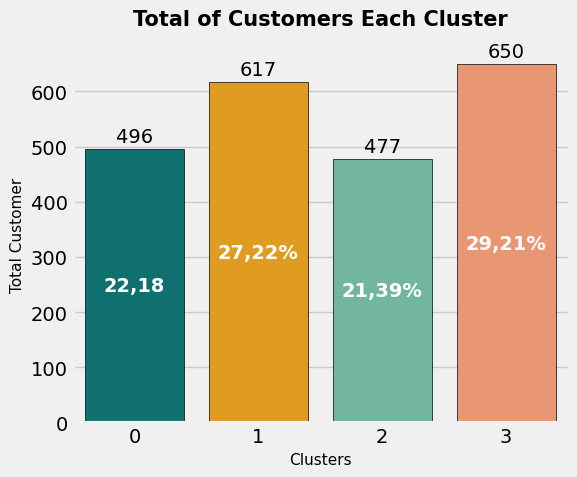

In [100]:
# Buat palet warna khusus dengan warna yang sesuai dengan masing-masing kluster
custom_palette = ['teal', 'orange', '#66c2a5', '#fc8d62']

fig, ax = plt.subplots(figsize=(6, 5))
plt.title("Total of Customers Each Cluster", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='km_labels', y='total_customers', data=df_tc, edgecolor='black', palette=custom_palette)

plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['22,18', '27,22%', '21,39%','29,21%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()

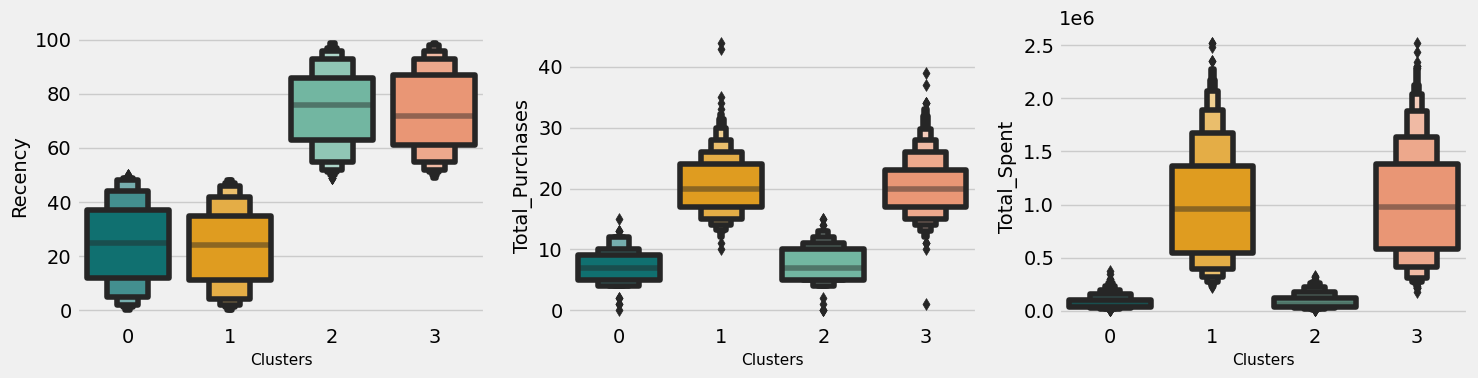

In [104]:
custom_palette = ['teal', 'orange', '#66c2a5', '#fc8d62']

df_clust = df_cl.copy()
clust = df_clust.columns.drop('km_labels')

selected_columns = ["Recency", "Total_Purchases", "Total_Spent"]

plt.figure(figsize=(15, 4))
for i in range(len(selected_columns)):
    plt.subplot(1, 3, i+1)
    sns.boxenplot(x=df_clust['km_labels'], y=df_clust[selected_columns[i]], palette=custom_palette) 
    plt.xlabel('Clusters', fontsize=11)
    plt.tight_layout()

plt.show()

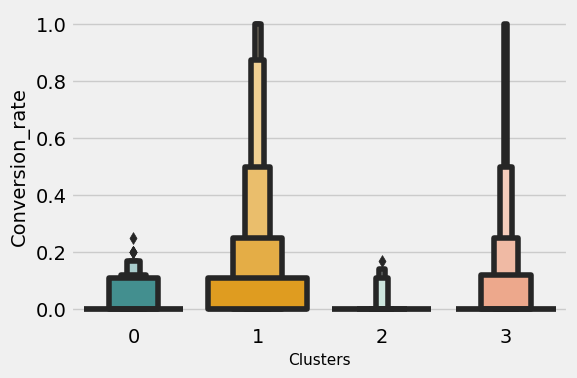

In [105]:
custom_palette = ['teal', 'orange', '#66c2a5', '#fc8d62']

plt.figure(figsize=(6, 4))
sns.boxenplot(x=df_cl['km_labels'], y=df_final['Conversion_rate'], palette=custom_palette)
plt.xlabel('Clusters', fontsize=11)
plt.tight_layout()
plt.show()

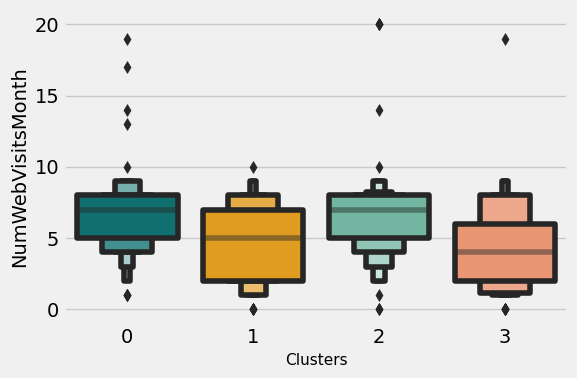

In [110]:
custom_palette = ['teal', 'orange', '#66c2a5', '#fc8d62']

plt.figure(figsize=(6, 4))
sns.boxenplot(x=df_cl['km_labels'], y=df_final['NumWebVisitsMonth'], palette=custom_palette)
plt.xlabel('Clusters', fontsize=11)
plt.tight_layout()
plt.show()

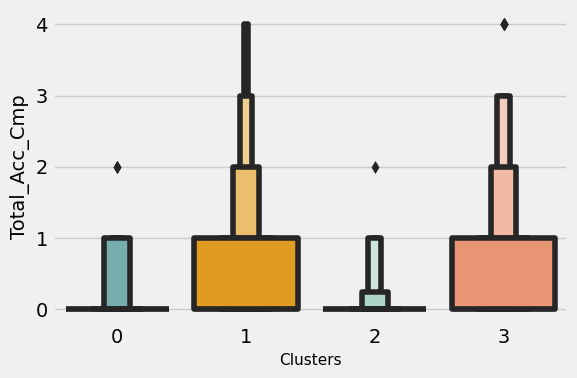

In [111]:
custom_palette = ['teal', 'orange', '#66c2a5', '#fc8d62']

plt.figure(figsize=(6, 4))
sns.boxenplot(x=df_cl['km_labels'], y=df_final['Total_Acc_Cmp'], palette=custom_palette)
plt.xlabel('Clusters', fontsize=11)
plt.tight_layout()
plt.show()

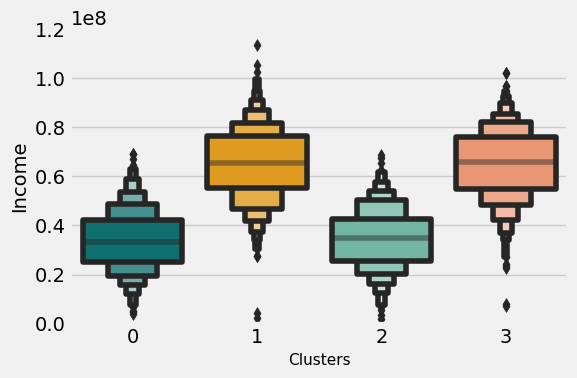

In [148]:
custom_palette = ['teal', 'orange', '#66c2a5', '#fc8d62']

plt.figure(figsize=(6, 4))
sns.boxenplot(x=df_cl['km_labels'], y=df_final['Income'], palette=custom_palette)
plt.ylim(0, 120000000)
plt.xlabel('Clusters', fontsize=11)
plt.tight_layout()
plt.show()

### Interpretasi

**Cluster 0 (Risk of Churn):**

Terdapat 479 pelanggan (22,28%).

Recency: Rendah (mengindikasikan bahwa pembelian terakhir pelanggan dalam waktu dekat).

Total Pembelian: Rendah (pelanggan jarang berbelanja).

Total Pengeluaran: Rendah (pelanggan menghabiskan sedikit uang).

Tingkat Konversi: Rendah (pelanggan cenderung tidak melakukan konversi).

Pendapatan: Rendah.

Interpretasi: Kelompok ini memiliki pendapatan dan pengeluaran terendah. Mereka sering mengunjungi situs web kita, namun jarang melakukan transaksi atau menggunakan promo-promo di platform kami. Mereka lebih cenderung bertransaksi secara organik.

**Cluster 1 (Mid Spender):**

Terdapat 588 pelanggan (27,22%).

Recency: Rendah (mengindikasikan bahwa pembelian terakhir pelanggan dalam waktu dekat).

Total Pembelian: Tinggi (pelanggan sering berbelanja).

Total Pengeluaran: Tinggi (pelanggan menghabiskan banyak uang).

Tingkat Konversi: Tinggi (pelanggan cenderung melakukan konversi).

Pendapatan: Tinggi.

Interpretasi: Kelompok ini memiliki pendapatan dan pengeluaran terbesar kedua setelah pengeluar besar. Meskipun mereka cukup jarang mengunjungi platform, mereka merespons kampanye dengan baik. Ciri khasnya adalah penggunaan promo yang lebih tinggi daripada pengeluar besar. Kami perlu memahami preferensi pembelian kelompok ini agar dapat mengelola promosi dengan lebih efisien dan mengurangi biaya kami.


**Cluster 2 (Low Spender):**

Terdapat 462 pelanggan (21,39%).

Recency: Tinggi (mengindikasikan bahwa pembelian terakhir pelanggan dalam waktu lama).

Total Pembelian: Rendah (pelanggan jarang berbelanja).

Total Pengeluaran: Sedang (pelanggan menghabiskan uang secara moderat).

Tingkat Konversi: Rendah (pelanggan cenderung tidak melakukan konversi).

Pendapatan: Rendah.

Interpretasi: Kelompok ini memiliki pengeluaran lebih rendah daripada pengeluar besar dan pengeluar menengah. Mereka cukup sering mengunjungi situs web dan mencari promo, tetapi mereka tidak mengaplikasikan promo se sering kelompok pengeluar menengah.


**Cluster 3 (High Spender):**

Terdapat 631 pelanggan (29,21%).

Recency: Tinggi (mengindikasikan bahwa pembelian terakhir pelanggan dalam waktu lama).

Total Pembelian: Tinggi (pelanggan sering berbelanja).

Total Pengeluaran: Tinggi (pelanggan menghabiskan banyak uang).

Tingkat Konversi: Tinggi (pelanggan cenderung melakukan konversi).

Pendapatan: Tinggi.

Interpretasi: Kelompok pelanggan ini jumlahnya lebih sedikit jika dibandingkan dengan total midspender ,total low spender  dan risk of churn, tetapi mereka adalah pengeluar besar dengan pendapatan dan pengeluaran yang tinggi di platform. Mereka tidak sering mengunjungi platform kita, tetapi ketika mereka melakukannya, mereka cenderung bertransaksi. Kelompok ini merupakan target yang sangat menarik karena memiliki tingkat konversi yang tinggi.





## Rekomendasi Bisnis

**Cluster 0 (Risk of Churn):**
Melihat perilaku mereka saat berhadapan dengan produk, apakah produk yang ditawarkan kurang sesuai, atau apakah sensitivitas terhadap harga memengaruhi mereka untuk tidak melakukan transaksi di platform kita.


**Cluster 0 (Mid Spender):**
Lakukan analisis lebih mendalam untuk memahami cara meningkatkan frekuensi transaksi dalam kelompok ini. Berikan rekomendasi yang lebih personal dan melakukan analisis lebih detail tentang bagaimana mengoptimalkan promosi untuk kelompok ini. Meskipun kami menawarkan promosi lebih sedikit, kelompok ini tetap berbelanja di platform kita.


**Cluster 0 (Low Spender):**
Berikan insentif kepada pelanggan dalam kelompok ini untuk mengaktifkan kembali aktivitas berbelanja mereka, misalnya dengan menawarkan diskon khusus atau promosi untuk pembelian pertama setelah jangka waktu yang lama.

**Cluster 0 (High Spender):**
Memantau transaksi dan retensi dari kelompok ini. Fokus pada peningkatan pelayanan agar kelompok ini tetap loyal dan tidak melakukan churn.

### Potential Impact

In [136]:
df_std_cluster['km_labels'] = kmeans.labels_
df_final['km_labels'] = kmeans.labels_
df_final.sample(5)

,Education,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Response,NumChildren,Total_Acc_Cmp,Total_Purchases,Total_Spent,Conversion_rate,age,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,grup_age_Adult,grup_age_Senior Adult,grup_age_Young Adult,Has_Parents_False,Has_Parents_True,km_labels,cluster
2172,2,60934000.0,2014-01-17,41,4,0,0,1,0,23,873000,0.00,39,1,0,0,0,0,0,1,0,0,0,1,1,High Spender
917,4,84169000.0,2013-07-08,9,3,0,1,0,2,20,1919000,0.33,32,0,0,0,0,0,1,0,0,1,1,0,1,High Spender
776,4,40760000.0,2013-08-30,64,6,0,0,1,0,8,93000,0.00,49,0,0,0,0,1,0,1,0,0,0,1,2,Low Spender
1107,1,15315000.0,2013-03-08,27,5,0,0,0,0,8,64000,0.00,44,0,0,0,0,0,1,1,0,0,1,0,0,Risk of Churn
2035,2,60905000.0,2013-05-12,27,2,0,0,1,0,15,392000,0.00,64,1,0,0,0,0,0,0,1,0,0,1,1,High Spender


In [140]:
cluster = []

for i in df_final['km_labels']:
    if i == 0:
        grup = 'Risk of Churn'
    elif i == 1:
        grup = 'Mid Spender'
    elif i == 2:
        grup = 'Low Spender'
    else:
        grup = 'High Spender'
    cluster.append(grup)
    
df_final['cluster'] = cluster

In [147]:
# Menghitung GMV untuk kelompok High Spender
high_spender_transactions = df_final[df_final['cluster'] == 'High Spender']
gmv_high_spender = high_spender_transactions['Total_Spent'].sum()
print("GMV High Spender:", gmv_high_spender)

# Menghitung GMV untuk kelompok Mid Spender
mid_spender_transactions = df_final[df_final['cluster'] == 'Mid Spender']
gmv_mid_spender = mid_spender_transactions['Total_Spent'].sum()
print("GMV Mid Spender:", gmv_mid_spender)

# Menghitung GMV untuk kelompok Low Spender
low_spender_transactions = df_final[df_final['cluster'] == 'Low Spender']
gmv_low_spender = low_spender_transactions['Total_Spent'].sum()
print("GMV Low Spender:", gmv_low_spender)

# Menghitung GMV untuk kelompok Risk of Churn
risk_of_churn_transactions = df_final[df_final['cluster'] == 'Risk of Churn']
gmv_risk_of_churn = risk_of_churn_transactions['Total_Spent'].sum()
print("GMV Risk of Churn:", gmv_risk_of_churn)

GMV High Spender: 662801000
GMV Mid Spender: 614752000
GMV Low Spender: 41176000
GMV Risk of Churn: 38259000


#### Potensial Impact 

- Jika kita fokus untuk memfokuskan pada high spender, kita bisa mendapatkan gmv_high_spender sebesar 662801000, sedangkan pada mid_spender sebesar 614752000.
